**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set gaya visual
sns.set(style="whitegrid")


**Generate Dummy Dataset**

In [ ]:
# Reproducible random seed
np.random.seed(42)

# Buat 100 data penjualan
n = 100
products = ['Laptop', 'Smartphone', 'Tablet', 'Headphone']
prices = {'Laptop': 7_000_000, 'Smartphone': 3_500_000, 'Tablet': 4_500_000, 'Headphone': 750_000}

data = {
    'Transaction_ID': [f'TX{1000+i}' for i in range(n)],
    'Customer_ID': np.random.randint(1000, 1050, n),
    'Product': np.random.choice(products, n),
    'Quantity': np.random.randint(1, 4, n),
    'Date': pd.date_range(start='2024-01-01', periods=n, freq='D')
}

df = pd.DataFrame(data)
df['Price'] = df['Product'].map(prices)
df['Total'] = df['Quantity'] * df['Price']
df.head()


,Transaction_ID,Customer_ID,Product,Quantity,Date,Price,Total
0,TX1000,1038,Laptop,2,2024-01-01,7000000,14000000
1,TX1001,1028,Headphone,3,2024-01-02,750000,2250000
2,TX1002,1014,Laptop,1,2024-01-03,7000000,7000000
3,TX1003,1042,Headphone,3,2024-01-04,750000,2250000
4,TX1004,1007,Headphone,2,2024-01-05,750000,1500000


**Data Overview**

In [ ]:
print("Info Dataset:")
df.info()

print("\nRingkasan Statistik:")
print(df.describe())

print("\nJumlah transaksi per produk:")
print(df['Product'].value_counts())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  100 non-null    object        
 1   Customer_ID     100 non-null    int64         
 2   Product         100 non-null    object        
 3   Quantity        100 non-null    int64         
 4   Date            100 non-null    datetime64[ns]
 5   Price           100 non-null    int64         
 6   Total           100 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 5.6+ KB

Ringkasan Statistik:
       Customer_ID    Quantity                 Date         Price  \
count   100.000000  100.000000                  100  1.000000e+02   
mean   1024.070000    2.000000  2024-02-19 12:00:00  3.982500e+06   
min    1000.000000    1.000000  2024-01-01 00:00:00  7.500000e+05   
25%    1013.000000    1.000000  2024-01-25 18:00

**Tambahkan Kolom Bulan dan Tahun**


In [ ]:
df['Month'] = df['Date'].dt.strftime('%Y-%m')
df['Year'] = df['Date'].dt.year


**Analisis Penjualan**

In [ ]:
product_sales = df.groupby('Product')['Total'].sum().sort_values(ascending=False)
print(product_sales)

print ("==========================BATAS==========================")

monthly_sales = df.groupby('Month')['Total'].sum()
print(monthly_sales)

print ("==========================BATAS==========================")

top_customers = df.groupby('Customer_ID')['Total'].sum().sort_values(ascending=False).head(5)
print(top_customers)


Product
Laptop        364000000
Tablet        274500000
Smartphone    129500000
Headphone      37500000
Name: Total, dtype: int64
==========================BATAS==========================
Month
2024-01    219500000
2024-02    260250000
2024-03    295500000
2024-04     30250000
Name: Total, dtype: int64
==========================BATAS==========================
Customer_ID
1013    53500000
1023    46000000
1006    39000000
1043    38250000
1039    37000000
Name: Total, dtype: int64


**Visualisasi Data**

Penjualan per Produk

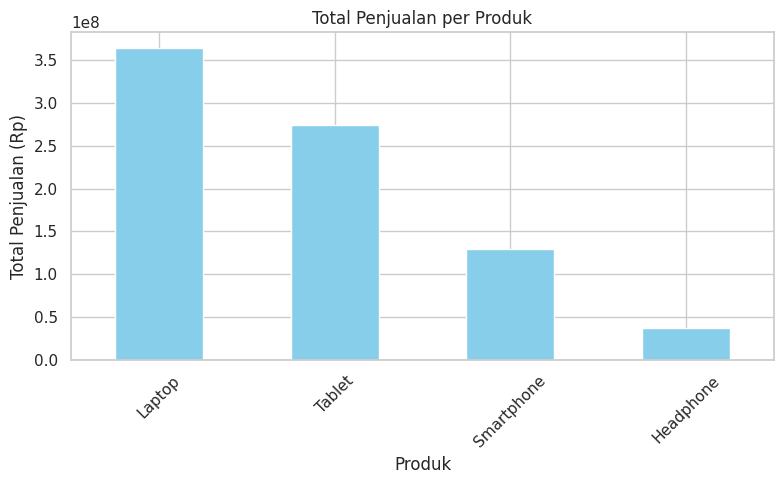

In [ ]:
plt.figure(figsize=(8, 5))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Penjualan per Produk')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan (Rp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Penjualan Bulanan

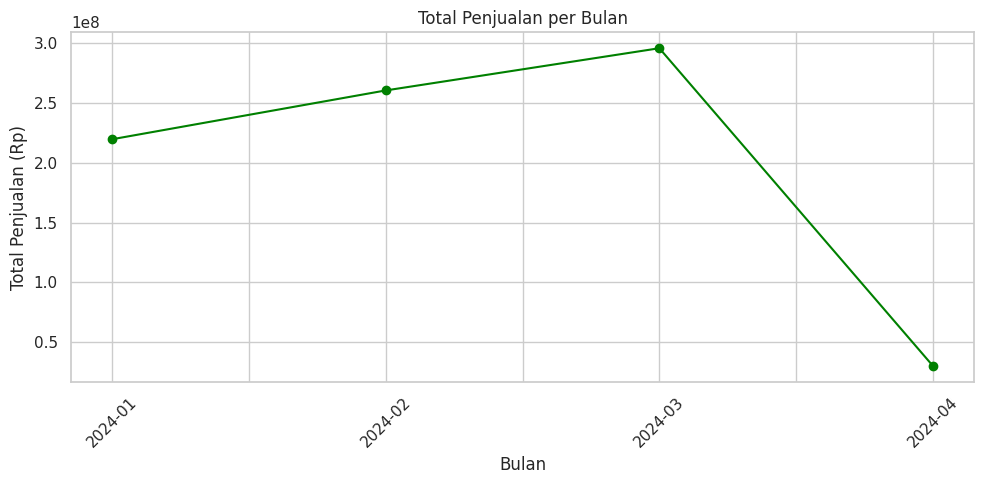

In [ ]:
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker='o', linestyle='-', color='green')
plt.title('Total Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (Rp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Customer

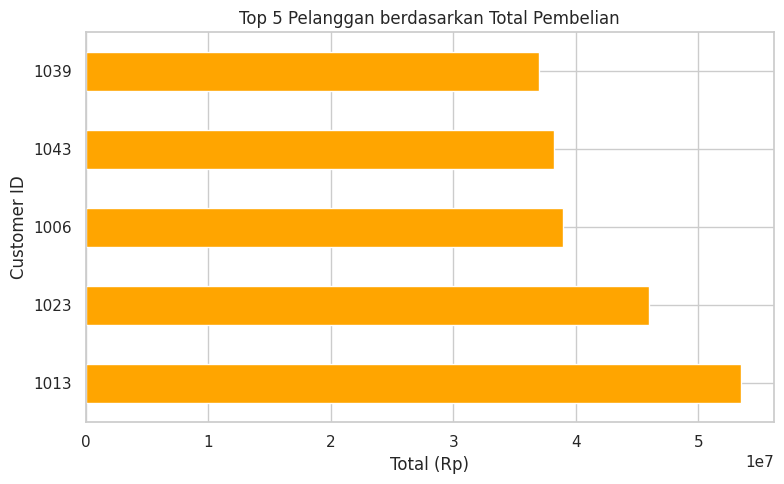

In [ ]:
plt.figure(figsize=(8, 5))
top_customers.plot(kind='barh', color='orange')
plt.title('Top 5 Pelanggan berdasarkan Total Pembelian')
plt.xlabel('Total (Rp)')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()


**Insight dari Analisis**

In [ ]:
from IPython.display import Markdown

insight = """
### 🔍 Insight dari Data:
1. **Produk Terlaris**: Produk dengan total penjualan tertinggi adalah `{}`
2. **Bulan Tertinggi**: Penjualan tertinggi terjadi pada bulan `{}`
3. **Customer Terbaik**: Pelanggan dengan ID `{}` menyumbang pembelian terbanyak sebesar Rp{:,.0f}
""".format(
    product_sales.idxmax(),
    monthly_sales.idxmax(),
    top_customers.idxmax(),
    top_customers.max()
)

display(Markdown(insight))



### 🔍 Insight dari Data:
1. **Produk Terlaris**: Produk dengan total penjualan tertinggi adalah `Laptop`
2. **Bulan Tertinggi**: Penjualan tertinggi terjadi pada bulan `2024-03`
3. **Customer Terbaik**: Pelanggan dengan ID `1013` menyumbang pembelian terbanyak sebesar Rp53,500,000


**Simpan Dataset (Opsional)**

In [ ]:
# Simpan dataset hasil analisis
df.to_csv('customer_sales_data.csv', index=False)
